In [3]:
%matplotlib inline


# Date tick labels


Show how to make date plots in matplotlib using date tick locators and
formatters.  See major_minor_demo1.py for more information on
controlling major and minor ticks

All matplotlib date plotting is done by converting date instances into days
since 0001-01-01 00:00:00 UTC plus one day (for historical reasons).  The
conversion, tick locating and formatting is done behind the scenes so this
is most transparent to you.  The dates module provides several converter
functions `matplotlib.dates.date2num` and `matplotlib.dates.num2date`.
These can convert between `datetime.datetime` objects and
:class:`numpy.datetime64` objects.



In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('%Y')

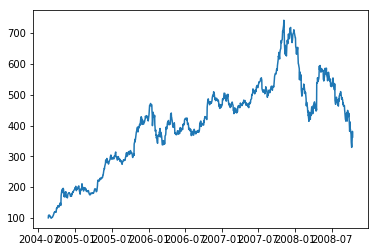

In [19]:

# Load a numpy record array from yahoo csv data with fields date, open, close,
# volume, adj_close from the mpl-data/example directory. The record array
# stores the date as an np.datetime64 with a day unit ('D') in the date column.
with cbook.get_sample_data('goog.npz') as datafile:
    r = np.load(datafile)['price_data'].view(np.recarray)

fig, ax = plt.subplots()
ax.plot(r.date, r.adj_close)

In [21]:
r.date

array(['2004-08-19', '2004-08-20', '2004-08-23', ..., '2008-10-10',
       '2008-10-13', '2008-10-14'], dtype='datetime64[D]')

In [6]:
# format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)

In [7]:
# round to nearest years...
datemin = np.datetime64(r.date[0], 'Y')
datemax = np.datetime64(r.date[-1], 'Y') + np.timedelta64(1, 'Y')
ax.set_xlim(datemin, datemax)


(731581.0, 733408.0)

In [8]:
# format the coords message box
def price(x):
    return '$%1.2f' % x
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.format_ydata = price
ax.grid(True)

In [18]:
price

<function __main__.price>

In [24]:
# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()

plt.show()